## MS5114 Advanced Programming for Business Analytics  
## Group Assignment 2022-2023
## Group 33
### Student Name: Iswariya Manisehar, ID: 22224279
### Student Name: Vigneshwaran Raja, ID: 22224111
### Student Name: Revanth Gengaiah, ID: 22210054
### Student Name: Dilip Venkatesan Sankar, ID: 22225743


#### Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Importing csv file as input

In [3]:
input = pd.read_csv('C:\Dilip\Business Analytics\Semester 2\Python\Assignment3\Group33_code\Group33_dataset.csv')

In [4]:
#Checking the structure
input.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [5]:
#checking for null values
input.isnull().sum(0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#assigning alias for region column
input['region'] = input['region'].replace({'southwest': 'SW', 'southeast': 'SE', 'northeast': 'NE', 'northwest': 'NW'})
input.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,SW,16884.92400
1,18,male,33.770,1,no,SE,1725.55230
2,28,male,33.000,3,no,SE,4449.46200
3,33,male,22.705,0,no,NW,21984.47061
4,32,male,28.880,0,no,NW,3866.85520
5,31,female,25.740,0,no,SE,3756.62160
6,46,female,33.440,1,no,SE,8240.58960
7,37,female,27.740,3,no,NW,7281.50560
8,37,male,29.830,2,no,NE,6406.41070
9,60,female,25.840,0,no,NW,28923.13692


#### Checking the distribution of categorical data using subplot

Distribution of Male and Female
male      676
female    662
Name: sex, dtype: int64


Distribution of Number of children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Distribution of Smokers and non-smokers
no     1064
yes     274
Name: smoker, dtype: int64


Distribution of region
SE    364
SW    325
NW    325
NE    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

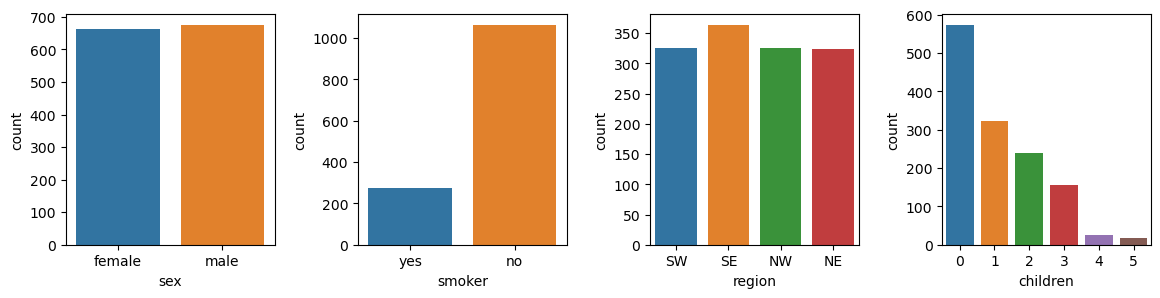

In [7]:
plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.4)
print("Distribution of Male and Female")
print(input.sex.value_counts())
plt.subplot(141) 
sns.countplot(x='sex', data=input)
print("\n")

print("Distribution of Number of children")
print(input.children.value_counts())
plt.subplot(144)
sns.countplot(x='children', data=input)
print("\n")

print("Distribution of Smokers and non-smokers")
print(input.smoker.value_counts())
plt.subplot(142) 
sns.countplot(x='smoker', data=input)
print("\n")

print("Distribution of region")
print(input.region.value_counts())
plt.subplot(143)
sns.countplot(x='region', data=input) 


#### Checking descriptive statistics

In [8]:
input.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#checking the mean of sex and smoking category for numercial columns -  age, bmi, children and charges
input.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [10]:
input.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


#### Showing the relationship between the numerical varibles and showing heatmap

In [11]:
correlation = input.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

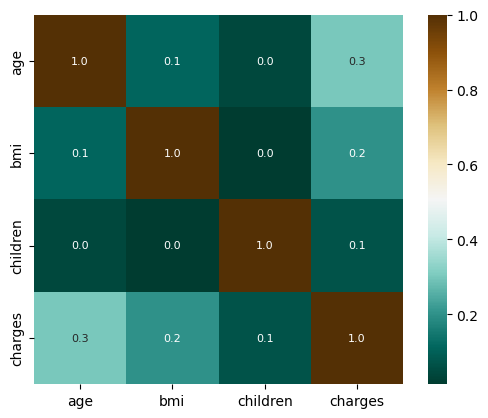

In [12]:
#heatmap to check the correlation
sns.heatmap(correlation,cbar=True,square=True,fmt = '.1f',annot=True,annot_kws={'size':8},cmap = 'BrBG_r')

#### Converting to categorical varibales into numeric value (encoding)

In [13]:
input['sex'] = input['sex'].astype('category')
input['smoker'] = input['smoker'].astype('category')
input['region'] = input['region'].astype('category')

#encoding data
input['sex'] = input['sex'].cat.codes #female=0, male=1
input['smoker'] = input['smoker'].cat.codes #yes=1, no=0
input['region'] = input['region'].cat.codes 

input.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


#### Distribution of smoker and non-smoker based on sex using catplot

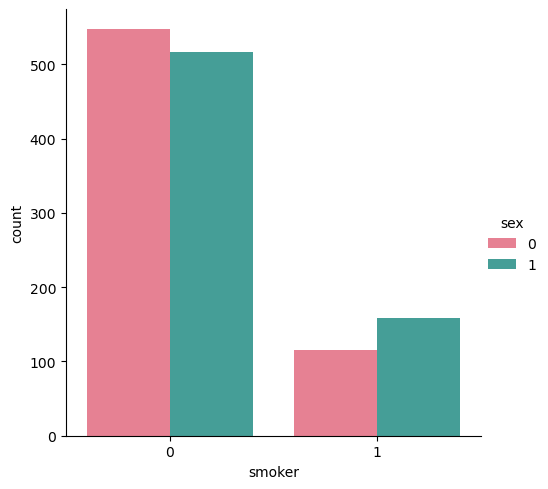

In [14]:
sns.catplot(x="smoker",  kind="count",hue = 'sex', palette="husl", data=input)
#female=0, male=1
#smoking yes=1, smoking no=0

#### Region wise distribution using Pie chart

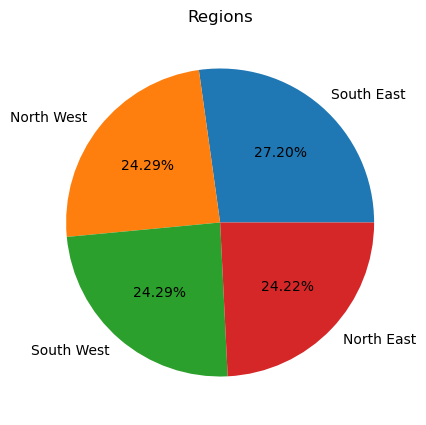

In [15]:
region_count = input['region'].value_counts(normalize=True)*100
plt.figure(figsize=(9,5))
plt.pie(region_count,labels=['South East','North West','South West','North East'],autopct='%1.2f%%')
plt.title('Regions')
plt.show()

#### Checking the distribution of charges based on smoking using distplot

C:\Users\san_s\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\san_s\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

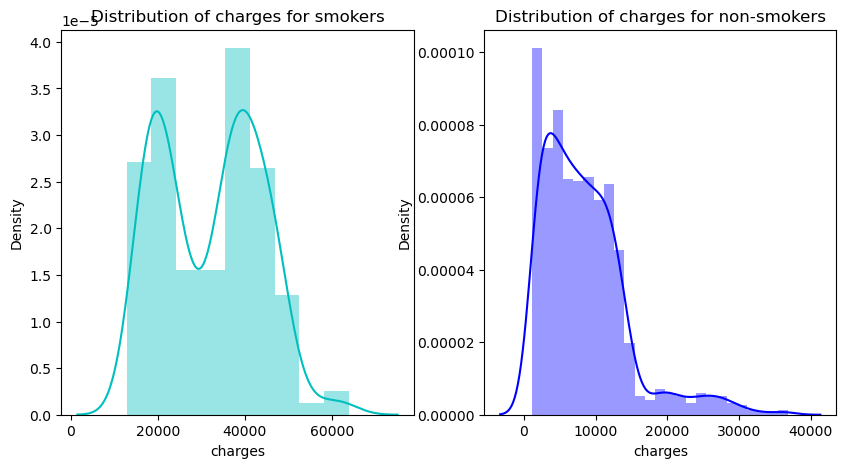

In [16]:
f= plt.figure(figsize=(10,5))

image=f.add_subplot(121)
sns.distplot(input[(input.smoker == 1)]["charges"],color='c',ax=image)
image.set_title('Distribution of charges for smokers')

image=f.add_subplot(122)
sns.distplot(input[(input.smoker == 0)]['charges'],color='b',ax=image)
image.set_title('Distribution of charges for non-smokers')

#### Scatter plot to check the charges based smoking and bmi

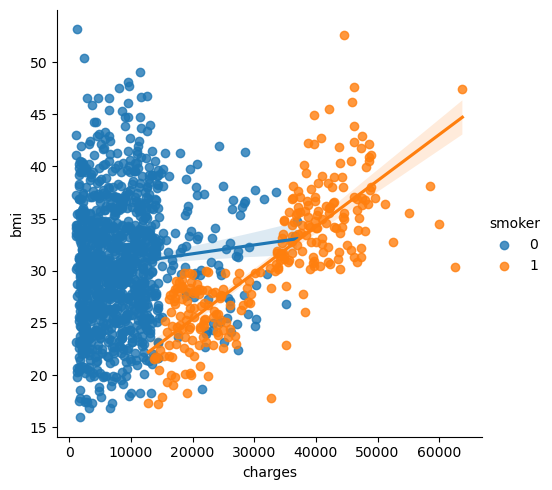

In [17]:
sns.lmplot(x='charges', y='bmi',hue='smoker', data=input);
#female=0, male=1
#smoking yes=1, smoking no=0

#### Check the Age distribution using Distplot

C:\Users\san_s\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


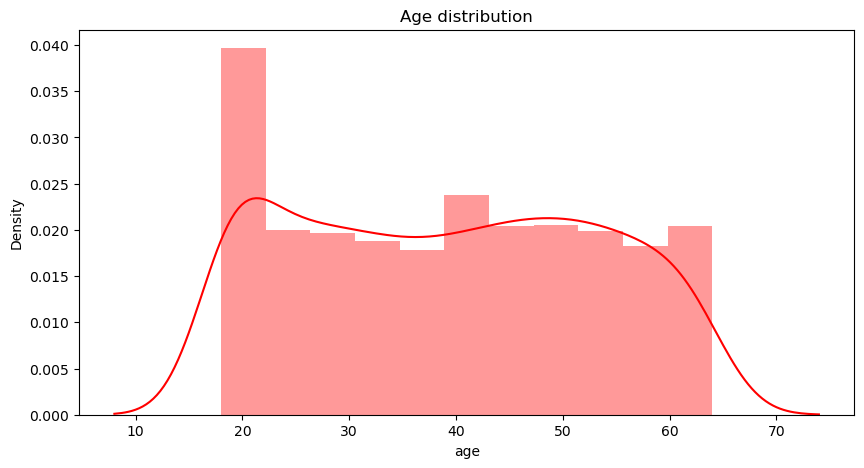

In [18]:
plt.figure(figsize=(10,5))
plt.title("Age distribution")
image = sns.distplot(input['age'], color = 'red')

## General prediction model using class and objects to check the insurance price based on custom input

In [19]:
class Insurance:
    def __init__(self,bmi,smooking,children):
        self.bmi = bmi
        self.smooking = smooking
        self.children = children
    
    def generate(self):
        if all([self.bmi >= 24, self.bmi <= 55, self.children >= 1, self.smooking >= 1]):
            return print("Cost can be higher")
        elif all([self.bmi >= 18 , self.bmi <= 23 , self.children >= 1 , self.smooking == 1]):
            return print("Cost can be moderate")
        else:
            return print("Cost can be less")


        
print("Test case 1")
check_sum = Insurance(20,1,1)
check_sum.generate()

print("\nTest case 2")
check_sum = Insurance(30,2,1)
check_sum.generate()

print("\nTest case 3")
check_sum = Insurance(16,0,0)
check_sum.generate()

Test case 1
Cost can be moderate

Test case 2
Cost can be higher

Test case 3
Cost can be less


## Training and Testing data split for building regression model

In [20]:
#X contains all the column info except charges which is the prediction column
X = input.drop(columns='charges',axis=1)
print("Input values")
print(X)

#Y contains insurance cost which is the prediction column
print("\nPrediction Values")
Y = input['charges']
print(Y)

Input values
      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

Prediction Values
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Using sklearn library to siplit train data, test data and also calculate error values

In [21]:
#xtrain and xtest contains all info from X and ytrain and ytest contains corresponding price of train and test (80:20)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [22]:
#checking the split of data 
print(X.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Building Linear Regression model

In [23]:
#Training data
#we use R2 for prediction model and accuracy score for classification problem
#importing libraries
from sklearn. linear_model import LinearRegression
from sklearn import metrics

#Linear regression
train_linear_reg = LinearRegression()
train_linear_reg.fit(X_train,Y_train)
train_linear_prediction = train_linear_reg.predict(X_train)

#R2 value
linear_r2_value = metrics.r2_score(Y_train,train_linear_prediction)
#calculating mean absolute error
linear_mean_absolute_value = metrics.mean_absolute_error(Y_train,train_linear_prediction)
#calculating mean square error
linear_mean_square_value = metrics.mean_squared_error(Y_train,train_linear_prediction)
#calculating root mean square error
linear_root_mean_square_value = np.sqrt(linear_mean_square_value)

print("R2 Error value:", linear_r2_value)
print("Mean Absolute Error value:", linear_mean_absolute_value)
print("Mean Sqaured Error:", linear_mean_square_value)
print("Root mean square error:", linear_root_mean_square_value)

R2 Error value: 0.7519923667088932
Mean Absolute Error value: 4140.028379854142
Mean Sqaured Error: 36104122.875132434
Root mean square error: 6008.670641259382


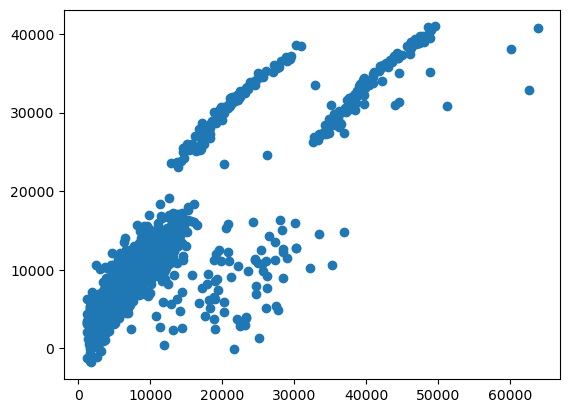

In [24]:
#plotting scatterplot for train data
plt.scatter(Y_train,train_linear_prediction)

## Buidling Lasso Regression Model

In [25]:
#importing libraries
from sklearn.linear_model import Lasso

#Lasso regression
train_lasso_reg = Lasso()
train_lasso_reg.fit(X_train,Y_train)
train_lasso_prediction = train_lasso_reg.predict(X_train)

#R2 square error
lasso_r2_value = metrics.r2_score(Y_train,train_lasso_prediction)
#calculating mean absolute error
lasso_mean_absolute_value = metrics.mean_absolute_error(Y_train,train_lasso_prediction)
#calculating mean square error
lasso_mean_square_value = metrics.mean_squared_error(Y_train,train_lasso_prediction)
#calculating root mean square error
lasso_root_mean_square_value = np.sqrt(lasso_mean_square_value)

print("R2 Error value:", lasso_r2_value)
print("Mean Absolute Error value:", lasso_mean_absolute_value)
print("Mean Sqaured Error:", lasso_mean_square_value)
print("Root mean square error:", lasso_root_mean_square_value)

R2 Error value: 0.7519922794279678
Mean Absolute Error value: 4140.501520346192
Mean Sqaured Error: 36104135.58119804
Root mean square error: 6008.671698570162


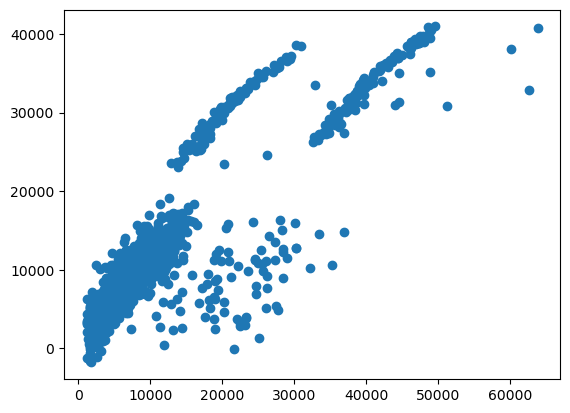

In [26]:
#plotting scatterplot for lasso train data
plt.scatter(Y_train,train_lasso_prediction)

## Building Support Vector Regression Model

In [27]:
#importing libraries
from sklearn.svm import SVR
svm = SVR()

#Support Vector Regression
svm.fit(X_train,Y_train)
svm_prediction = svm.predict(X_train)

#R2 square error
svm_r2_value = metrics.r2_score(Y_train,svm_prediction)
#calculating mean absolute error
svm_mean_absolute_value = metrics.mean_absolute_error(Y_train,svm_prediction)
#calculating mean square error
svm_mean_square_value = metrics.mean_squared_error(Y_train,svm_prediction)
#calculating root mean square error
svm_root_mean_square_value = np.sqrt(svm_mean_square_value)

print("R2 Error value:", svm_r2_value)
print("Mean Absolute Error value:", svm_mean_absolute_value)
print("Mean Sqaured Error:", svm_mean_square_value)
print("Root mean square error:", svm_root_mean_square_value)

R2 Error value: -0.1110463985251926
Mean Absolute Error value: 8270.732866550761
Mean Sqaured Error: 161742423.65049547
Root mean square error: 12717.799481454937


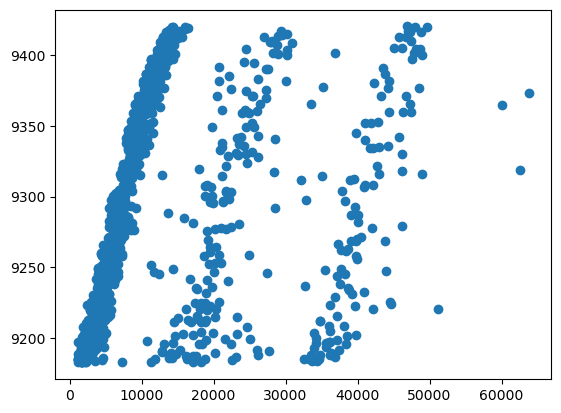

In [28]:
#plotting scatterplot for SVM train data
plt.scatter(Y_train,svm_prediction)

## Building Random Forest Regressor Model

In [29]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#Random Forest Regressor
rf.fit(X_train,Y_train)
rf_prediction = rf.predict(X_train)

#R2 square error
rf_r2_value = metrics.r2_score(Y_train,rf_prediction)
#calculating mean absolute error
rf_mean_absolute_value = metrics.mean_absolute_error(Y_train,rf_prediction)
#calculating mean square error
rf_mean_square_value = metrics.mean_squared_error(Y_train,rf_prediction)
#calculating root mean square error
rf_root_mean_square_value = np.sqrt(rf_mean_square_value)

print("R2 Error value:", rf_r2_value)
print("Mean Absolute Error value:", rf_mean_absolute_value)
print("Mean Sqaured Error:", rf_mean_square_value)
print("Root mean square error:", rf_root_mean_square_value)

R2 Error value: 0.9774755752006054
Mean Absolute Error value: 997.1922828724671
Mean Sqaured Error: 3279030.5276389513
Root mean square error: 1810.8093570663234


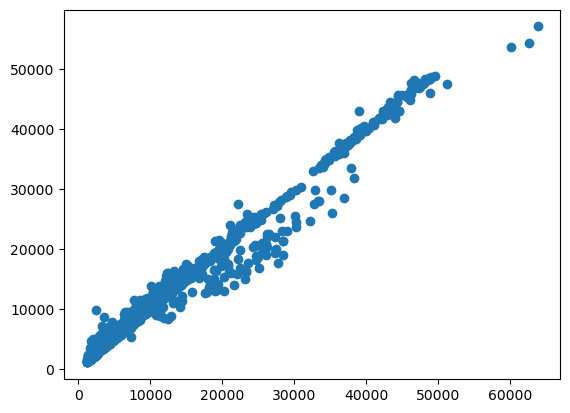

In [30]:
#plotting scatterplot for random forest train data
plt.scatter(Y_train,rf_prediction)

## Building Gradient Boosting Regressor Model

In [31]:
#importing libraries
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()

#Gradient boosting regressor
gr.fit(X_train,Y_train)
gr_prediction = gr.predict(X_train)

#R2 square error
gr_r2_value = metrics.r2_score(Y_train,gr_prediction)
#calculating mean absolute error
gr_mean_absolute_value = metrics.mean_absolute_error(Y_train,gr_prediction)
#calculating mean square error
gr_mean_square_value = metrics.mean_squared_error(Y_train,gr_prediction)
#calculating root mean square error
gr_root_mean_square_value = np.sqrt(gr_mean_square_value)

print("R2 Error value:", gr_r2_value)
print("Mean Absolute Error value:", gr_mean_absolute_value)
print("Mean Sqaured Error:", linear_mean_square_value)
print("Root mean square error:", gr_root_mean_square_value)

R2 Error value: 0.9047836925567392
Mean Absolute Error value: 2031.1177059331935
Mean Sqaured Error: 36104122.875132434
Root mean square error: 3723.0729246297587


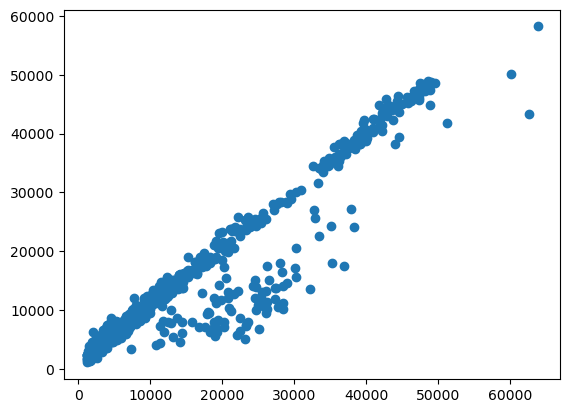

In [32]:
#plotting scatterplot for gradient boosting train data
plt.scatter(Y_train,gr_prediction)

### Model Comparison

In [33]:
#Dataframe for value comparison
linear_regression_results = pd.DataFrame([['Linear Regression',linear_r2_value,linear_mean_absolute_value,
                                          linear_mean_square_value,linear_root_mean_square_value]], columns = 
                                        ['Model Name','R-Sqaure','MAE','MSE','RMSE'])
lasso_regression_results = pd.DataFrame([['Lasso Regression',lasso_r2_value,lasso_mean_absolute_value,
                                          lasso_mean_square_value,lasso_root_mean_square_value]], columns = 
                                        ['Model Name','R-Sqaure','MAE','MSE','RMSE'])
svm_regression_results = pd.DataFrame([['SVM Regression',svm_r2_value,svm_mean_absolute_value,
                                          svm_mean_square_value,svm_root_mean_square_value]], columns = 
                                        ['Model Name','R-Sqaure','MAE','MSE','RMSE'])
rf_regression_results = pd.DataFrame([['Random Forset Regression',rf_r2_value,rf_mean_absolute_value,
                                          rf_mean_square_value,rf_root_mean_square_value]], columns = 
                                        ['Model Name','R-Sqaure','MAE','MSE','RMSE'])
gr_regression_results = pd.DataFrame([['Gradient boosting Regression',gr_r2_value,gr_mean_absolute_value,
                                          gr_mean_square_value,gr_root_mean_square_value]], columns = 
                                        ['Model Name','R-Sqaure','MAE','MSE','RMSE'])
linear_regression_results
lasso_regression_results
svm_regression_results
rf_regression_results
gr_regression_results
pd.concat([linear_regression_results,lasso_regression_results,svm_regression_results,
          rf_regression_results,gr_regression_results])

#greater r-squared
#lower RMSE

,Model Name,R-Sqaure,MAE,MSE,RMSE
0,Linear Regression,0.751992,4140.028380,3.610412e+07,6008.670641
0,Lasso Regression,0.751992,4140.501520,3.610414e+07,6008.671699
0,SVM Regression,-0.111046,8270.732867,1.617424e+08,12717.799481
0,Random Forset Regression,0.977476,997.192283,3.279031e+06,1810.809357
0,Gradient boosting Regression,0.904784,2031.117706,1.386127e+07,3723.072925


In [34]:
#creating dataframe for price comparison
data_frame1 = pd.DataFrame({'Original':Y_train, 'LR':train_linear_prediction, 'Lasso':train_lasso_prediction, 
                         'SVM':svm_prediction, 'RF':rf_prediction, 'GR':gr_prediction})
data_frame1

,Original,LR,Lasso,SVM,RF,GR
882,2585.85065,852.639793,851.835121,9191.291724,2545.038981,3141.297110
505,6796.86325,9173.478642,9175.218283,9266.270772,6689.068206,7812.440474
798,11848.14100,12809.130179,12810.072146,9396.625153,12208.827281,11852.267822
792,2731.91220,1449.652285,1448.753681,9193.399487,2911.104593,3723.787377
201,8871.15170,10920.385080,10919.810406,9339.320132,8839.843384,10236.593265
...,...,...,...,...,...,...
466,13224.69300,12445.572719,12446.202461,9403.548455,14833.619890,15025.534467
299,9249.49520,10135.962211,10134.734408,9337.597726,9270.192179,10406.331343
493,12574.04900,16934.638799,16939.150418,9406.127110,12994.900705,13285.338729
527,9861.02500,9224.062782,9224.975685,9354.234686,11141.528140,10445.037998


#### Creating a Dataframe for storing new values

In [35]:
input_data = {'age':19, 'sex':0, 'bmi':27.9, 'children':0, 'smoker':1, 'region':3}
dataframe2 = pd.DataFrame(input_data, index=[0])
dataframe2

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3


#### Prediction using random forest

In [36]:
insurance = rf.predict(dataframe2)
print("Predicted insrance cost: ", insurance[0])

Predicted insrance cost:  16850.895636000023


## Let's check if the charge are correct with the available data

In [37]:
X_train.head(2) #displays the forst row of independent variable values in the dataset

,age,sex,bmi,children,smoker,region
882,21,0,22.135,0,0,0
505,37,1,30.875,3,0,1


In [38]:
Y_train.head(2) #displays the corresponding price of the first row

882    2585.85065
505    6796.86325
Name: charges, dtype: float64

In [39]:
#building prediction model using dataframe
input_data = {'age':21, 'sex':0, 'bmi':22.135, 'children':0, 'smoker':0, 'region':0}
prediction = pd.DataFrame(input_data, index=[0])
prediction

,age,sex,bmi,children,smoker,region
0,21,0,22.135,0,0,0


In [40]:
insurance = rf.predict(prediction)
print("Predicted insrance cost: ", insurance[0])

Predicted insrance cost:  2545.0389811900004


In [41]:
#building prediction model using dataframe
input_data = {'age':37, 'sex':1, 'bmi':30.875, 'children':3, 'smoker':0, 'region':1}
prediction = pd.DataFrame(input_data, index=[0])
prediction

,age,sex,bmi,children,smoker,region
0,37,1,30.875,3,0,1


In [193]:
insurance = rf.predict(prediction)
print("Predicted insrance cost: ", insurance[0])

Predicted insrance cost:  6820.046061500007


## References

In [42]:
#The Click Reader, Published Oct 19, 2021 - https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165 [accessed 04/08/2023]
#Thank you